In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [22]:
df = pd.read_csv("s3://loan-bucket-ona/Loan_Default.csv")

***Initial Exploration***

In [23]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [24]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

# Data Transformations

***Creating a column***

Creating a column called loan age

In [25]:
df['loan_age'] = datetime.now().year - df['year']


***Removing nulls***

Check nulls when the status is 1

In [26]:
df_test = df.loc[df['Status']==1,:]
df_test.shape

(36639, 35)

Dealing with null values

In [27]:
df_test.isnull().sum()

ID                               0
year                             0
loan_limit                     881
Gender                           0
approv_in_adv                  241
loan_type                        0
loan_purpose                    35
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              36486
term                            15
Neg_ammortization               32
interest_only                    0
lump_sum_payment                 0
property_value               15096
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        1239
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

Dropping columns with all null values for status =1 , also droping column year as we now have loan age and id 

In [28]:
df_drop = df.drop(columns=['rate_of_interest','Interest_rate_spread','Upfront_charges','year','ID'],axis=1)

for the remaining removing null values

In [29]:
df_drop.dropna(how='any',inplace=True)

In [30]:
df_drop.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
loan_age                     0
dtype: int64

***Encoding data***

Checking how many categories are there in categorical columns

In [31]:
def check_categorical_columns(df):     
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns     
    for col in categorical_columns:         
        unique_values = df[col].unique()        
        num_categories = len(unique_values)         
        if num_categories >= 2:             
            print(f"{col}: {num_categories} categories (more than one category) - Values: {unique_values}") 
        else: print(f"{col}: {num_categories} category (only one category) - Value: {unique_values[0]}")

check_categorical_columns(df_drop)

loan_limit: 2 categories (more than one category) - Values: ['cf' 'ncf']
Gender: 4 categories (more than one category) - Values: ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv: 2 categories (more than one category) - Values: ['nopre' 'pre']
loan_type: 3 categories (more than one category) - Values: ['type1' 'type3' 'type2']
loan_purpose: 4 categories (more than one category) - Values: ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness: 2 categories (more than one category) - Values: ['l1' 'l2']
open_credit: 2 categories (more than one category) - Values: ['nopc' 'opc']
business_or_commercial: 2 categories (more than one category) - Values: ['nob/c' 'b/c']
Neg_ammortization: 2 categories (more than one category) - Values: ['not_neg' 'neg_amm']
interest_only: 2 categories (more than one category) - Values: ['not_int' 'int_only']
lump_sum_payment: 2 categories (more than one category) - Values: ['not_lpsm' 'lpsm']
construction_type: 2 categories (more than one category) - Values: ['sb' 

In [32]:
# Make a copy for encoding
df_encode = df_drop
# Define lists for binary and multi-category columns
binary_columns = [
    'loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 
    'business_or_commercial', 'Neg_ammortization', 'interest_only', 
    'lump_sum_payment', 'construction_type', 'Secured_by', 
    'co-applicant_credit_type', 'submission_of_application', 'Security_Type'
]

# Dictionary for mapping binary values
binary_mappings = {
    'loan_limit': {'cf': 1, 'ncf': 0},
    'approv_in_adv': {'pre': 1, 'nopre': 0},
    'Credit_Worthiness': {'l1': 1, 'l2': 0},
    'open_credit': {'opc': 1, 'nopc': 0},
    'business_or_commercial': {'b/c': 1, 'nob/c': 0},
    'Neg_ammortization': {'neg_amm': 1, 'not_neg': 0},
    'interest_only': {'int_only': 1, 'not_int': 0},
    'lump_sum_payment': {'lpsm': 1, 'not_lpsm': 0},
    'construction_type': {'mh': 1, 'sb': 0},
    'Secured_by': {'land': 1, 'home': 0},
    'co-applicant_credit_type': {'EXP': 1, 'CIB': 0},
    'submission_of_application': {'to_inst': 1, 'not_inst': 0},
    'Security_Type': {'direct': 1, 'Indriect': 0}
}

# Apply binary mapping for binary columns
for col, mapping in binary_mappings.items():
    df_encode[col] = df_encode[col].map(mapping)

In [33]:
# One-Hot Encoding for multi-category columns
multi_category_columns = [
    'Gender', 'loan_type', 'loan_purpose', 'occupancy_type', 
    'total_units', 'credit_type', 'age', 'Region'
]
df_encode_hot = pd.get_dummies(df_encode, columns=multi_category_columns, drop_first=True)

***Scaling the data***

In [34]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns (continuous variables)
numerical_columns = [
    'loan_amount', 'term', 'property_value', 'income', 'Credit_Score',
    'LTV', 'dtir1', 'loan_age'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_encode_hot[numerical_columns] = scaler.fit_transform(df_encode_hot[numerical_columns])

In [47]:
df_final = df_encode_hot
df_final.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,...,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
0,1,0,1,0,0,-1.165910,0.439043,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0.422340,0.439043,1,0,0,...,1,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0.696177,0.439043,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,1,1,0,0,2.010591,0.439043,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,2.065358,0.439043,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [48]:
target_column = "Status"  # Replace with the actual name of your dependent variable
columns = [target_column] + [col for col in df_final.columns if col != target_column]
df_final = df_final[columns]

In [49]:
df_final.head()

,Status,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,...,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
0,1,1,0,1,0,0,-1.165910,0.439043,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,1,1,0,0,0.422340,0.439043,1,0,...,1,1,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0.696177,0.439043,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,1,1,1,0,0,2.010591,0.439043,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,1,0,0,2.065358,0.439043,0,0,...,1,1,0,0,0,0,0,0,0,0


# Splitting Data

In this section we are splitting the data into training, testing and validation. Validation data helps us check if the model has been overfitted.

In [50]:
from sklearn.model_selection import train_test_split

Splitting the data into training, validation and testing

In [51]:
train_df, temp_df = train_test_split(df_final, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=44)

Saving the data as csv

In [52]:
train_df.to_csv("train_train.csv", index=False, header=False)
val_df.to_csv("validation.csv", index=False, header=False)
test_df.to_csv("test.csv", index=False, header=False)

# Hyperparameter Tuning

In this section we perform the hyperparameter tuning. The hyperparameters we tune here are the learning rate, mini batch size and use bias. 
- Learning rate: The learning rate controls the step size at which the model's weights are updated during training.
- Mini batch size: The mini batch size refers to the number of samples the model processes before updating its weights during one iteration.
- Use bias: A bias term is an additional parameter in a model that allows it to shift the decision boundary independently of the input features.

The tuning job will compolete 10 training jobs and we will take the best model We do not have to perform training separately.

Import the boto3 and sagemaker libraries

In [56]:
import boto3
import sagemaker
from sagemaker import get_execution_role

Initializing boto3 sagemaker and s3 client

In [57]:
s3_client = boto3.client("s3")
sagemaker_client = boto3.client("sagemaker")
region = boto3.Session().region_name

Getting the role and the bucket details

In [58]:
role = get_execution_role()
s3_bucket = "cloud-final-project-loan"
prefix = "linearlearner"
training_input_path = f"s3://{s3_bucket}/{prefix}/input/train_train.csv"
validation_input_path = f"s3://{s3_bucket}/{prefix}/input/validation.csv"
output_path = f"s3://{s3_bucket}/{prefix}/output/"

Uploading the data to S3

In [59]:
s3_client.upload_file("train_train.csv", s3_bucket, f"{prefix}/input/train_train.csv")
s3_client.upload_file("validation.csv", s3_bucket, f"{prefix}/input/validation.csv")
s3_client.upload_file("test.csv", s3_bucket, f"{prefix}/input/test.csv")

In [60]:
print(f"Training data uploaded to: {training_input_path}")
print(f"Validation data uploaded to: {validation_input_path}")


Training data uploaded to: s3://cloud-final-project-loan/linearlearner/input/train_train.csv
Validation data uploaded to: s3://cloud-final-project-loan/linearlearner/input/validation.csv


Defining the container for the linear learner algorithm. 

In [61]:
import time
from sagemaker import image_uris

In [62]:
# Retrieve the container image URI for Linear Learner
container = image_uris.retrieve(region=boto3.Session().region_name, framework="linear-learner")

This is where we are defining the trainig job. It uses the boto3 template for API call to sagemaker. We are naming the linear job and adding container, role, training, and validation input path.

In [63]:


# Generate a unique job name
linear_job = "final-linear-" + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
print("Job name is:", linear_job)

# Define TrainingJobDefinition for the Tuning Job
training_job_definition = {
    "AlgorithmSpecification": {
        "TrainingImage": container,
        "TrainingInputMode": "File",
    },
    "RoleArn": role,
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": training_input_path,
                    "S3DataDistributionType": "ShardedByS3Key",
                }
            },
            "ContentType": "text/csv",
            "CompressionType": "None",
            "RecordWrapperType": "None",
        },
        {
            "ChannelName": "validation",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": validation_input_path,
                    "S3DataDistributionType": "FullyReplicated",
                }
            },
            "ContentType": "text/csv",
            "CompressionType": "None",
            "RecordWrapperType": "None",
        },
    ],
    "OutputDataConfig": {"S3OutputPath": output_path},
    "ResourceConfig": {
        "InstanceCount": 1,
        "InstanceType": "ml.m5.xlarge",
        "VolumeSizeInGB": 10,
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 60 * 60},
    "StaticHyperParameters": {  # Include static hyperparameters
        "predictor_type": "binary_classifier",  # Define predictor type for binary classification
    }
}


Job name is: final-linear-2024-12-04-18-35-29


Setting up the tuning job configuration. Here we are defining the hyperparameter ranges. We are using Bayesian as our strategy instead of random or gridsearch. We are also tuning the hyperparameter to maximize binary classification accuracy. We are using the hyperparameters learningrate, minibatchsize and epochs.

In [64]:
from time import gmtime, strftime, sleep

tuning_job_name = "tuning-job-"+ strftime("%d-%H-%M-%S", gmtime())

In [65]:
# Define the Hyperparameter Tuning Job
tuning_job_config = {
    "HyperParameterTuningJobName": tuning_job_name,
    "HyperParameterTuningJobConfig": {
        "Strategy": "Bayesian",
        "HyperParameterTuningJobObjective": {
            "MetricName": "validation:binary_classification_accuracy",
            "Type": "Maximize",
        },
        "ResourceLimits": {
            "MaxNumberOfTrainingJobs": 10,
            "MaxParallelTrainingJobs": 1,
        },
        "ParameterRanges": {
            "ContinuousParameterRanges": [
                {
                    "Name": "learning_rate",
                    "MinValue": "0.01",
                    "MaxValue": "0.2",
                },
            ],
            "IntegerParameterRanges": [
                {
                    "Name": "mini_batch_size",
                    "MinValue": "32",
                    "MaxValue": "512",
                },
            ],
            "CategoricalParameterRanges": [
                {
                    "Name": "use_bias",
                    "Values": ["True", "False"],
                },
            ],
        },
    },
    "TrainingJobDefinition": training_job_definition,  # Use the updated TrainingJobDefinition
}

Launching the tuning job 

In [66]:
# Launch the Hyperparameter Tuning Job
sagemaker_client = boto3.client("sagemaker")
response = sagemaker_client.create_hyper_parameter_tuning_job(**tuning_job_config)

print("Hyperparameter Tuning Job launched.")

Hyperparameter Tuning Job launched.


# Hosting

In this section we take the best model artifact saved in a S3 bucket. We use the artifact to create a model. We will create endpoint configuration and create an endpoint for our model.

Let us get the best training job from the hyperparameter training 

In [67]:
# Fetch the best training job
response = sagemaker_client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)
best_training_job_name = response["BestTrainingJob"]["TrainingJobName"]
best_training_job_metrics = response["BestTrainingJob"]["FinalHyperParameterTuningJobObjectiveMetric"]
best_hyperparameters = response["BestTrainingJob"]["TunedHyperParameters"]

# Print details
print(f"Best Training Job Name: {best_training_job_name}")
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Validation Accuracy: {best_training_job_metrics['Value']:.4f}")

Best Training Job Name: tuning-job-04-18-35-30-004-79b0916a
Best Hyperparameters: {'learning_rate': '0.12906586175308188', 'mini_batch_size': '220', 'use_bias': 'False'}
Best Validation Accuracy: 0.8453


We are going to take the best model and see its model artifacts

In [68]:
# Fetch the best training job details
training_job_info = sagemaker_client.describe_training_job(TrainingJobName=best_training_job_name)

# Extract model artifact location
model_artifact = training_job_info["ModelArtifacts"]["S3ModelArtifacts"]
print("Model Artifact Location:", model_artifact)



Model Artifact Location: s3://cloud-final-project-loan/linearlearner/output/tuning-job-04-18-35-30-004-79b0916a/output/model.tar.gz


We are going to use the artifacts from the best model to build the model

In [69]:
# Create a model
model_name = f"{best_training_job_name}-model"
container = training_job_info["AlgorithmSpecification"]["TrainingImage"]

response = sagemaker_client.create_model(
    ModelName=model_name,
    PrimaryContainer={
        "Image": container,
        "ModelDataUrl": model_artifact,
    },
    ExecutionRoleArn=role,
)
print("Model Created:", response["ModelArn"])

Model Created: arn:aws:sagemaker:ca-central-1:232988717136:model/tuning-job-04-18-35-30-004-79b0916a-model


Here we are going to deploy the model

In [70]:
endpoint_config_name = f"{model_name}-config"
endpoint_name = f"{model_name}-endpoint"

# Create endpoint configuration
sagemaker_client.create_endpoint_config(
    EndpointConfigName=endpoint_config_name,
    ProductionVariants=[
        {
            "VariantName": "AllTraffic",
            "ModelName": model_name,
            "InitialInstanceCount": 1,
            "InstanceType": "ml.m5.large",
            "InitialVariantWeight": 1,
        }
    ],
)

# Deploy the endpoint
sagemaker_client.create_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=endpoint_config_name,
)
print(f"Endpoint {endpoint_name} is being created.")

Endpoint tuning-job-04-18-35-30-004-79b0916a-model-endpoint is being created.


Checking to see if the model has been creted

In [71]:
import time

while True:
    response = sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
    status = response["EndpointStatus"]
    print(f"Endpoint status: {status}")
    if status == "InService":
        print(f"Endpoint {endpoint_name} is ready for use.")
        break
    elif status == "Failed":
        raise Exception(f"Endpoint creation failed: {response['FailureReason']}")
    time.sleep(30)

Endpoint status: Creating
Endpoint status: Creating
Endpoint status: Creating
Endpoint status: Creating
Endpoint status: Creating
Endpoint status: Creating
Endpoint status: Creating
Endpoint status: InService
Endpoint tuning-job-04-18-35-30-004-79b0916a-model-endpoint is ready for use.


# Inferencing

We will use our test data to infer our model using the endpoint that we created earlier.

In [80]:
import json
from sklearn.metrics import confusion_matrix, accuracy_score

We are going to use the test_df for our inferencing and also check the metrics. Here we are creating a runtime client and using it to envoke the endpoint. The response is the output of the model in JSON

In [72]:
runtime_client = boto3.client("sagemaker-runtime")
inf_df = test_df.drop(columns=['Status'])
test_csv = inf_df.to_csv(header=False,index=False).encode("utf-8")

response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType="text/csv",
    Body=test_csv
)

batch_result = response["Body"].read().decode("utf-8")


We are converting the JSON reposnse to a dictionary and then getting the values of the output

In [81]:
response_json = json.loads(batch_result)
predictions = [item["predicted_label"] for item in response_json["predictions"]]

Lets get the actual labels from the test data to compare with the output of our model.

In [83]:

actual_labels = test_df['Status'].values

Getting the confusion matrix and the accuracy

In [84]:

conf_matrix = confusion_matrix(actual_labels, predictions)
accuracy = accuracy_score(actual_labels, predictions)

Lets visualize the confusion Matrix

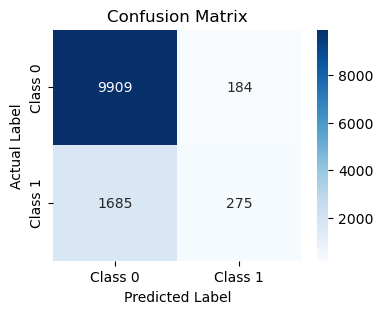

In [90]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [93]:
print('The accuracy of the model is {} %'.format(round(accuracy,2)*100))

The accuracy of the model is 84.0 %


# Deploying

We will implement two different methods of deploying our model ensuring uptime.
- Canary testing : A deployment strategy where a new model or feature is gradually rolled out to a small subset of users before a full release.
- Shadow testing: A testing strategy where a new model runs in parallel with the current production model but does not affect the live system or users.

In the first instance for Canary testing we will take 3 of our best model artifacts. On the second one we will intentionaly use wrong image(xg-boost, out artifacts are built with linear learner) so that we can simulate a failure. When it fails we will automatically roll back to the first model which  is stable.

In shadow testing how we can safely transfer from one model to another without downtime

In [1]:
import time
import os
import boto3
import botocore
import re
import json
from datetime import datetime, timedelta, timezone
from sagemaker import get_execution_role, session
from sagemaker.s3 import S3Downloader, S3Uploader

region = boto3.Session().region_name

# You can use a different IAM role with "SageMakerFullAccess" policy for this notebook
role = get_execution_role()
print(f"Execution role: {role}")

sm_session = session.Session(boto3.Session())
sm = boto3.Session().client("sagemaker")
sm_runtime = boto3.Session().client("sagemaker-runtime")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
Execution role: arn:aws:iam::145431273548:role/LabRole


Here we are defining the location of the models getting the model url

In [9]:
import boto3

# Define bucket name and prefix
bucket = "training-loan-rn"
prefix = "models"

# Construct S3 URIs for the model files
model_url1 = f"s3://{bucket}/{prefix}/model.tar.gz"
model_url2 = f"s3://{bucket}/{prefix}/model2.tar.gz"

# Print the model URLs
print(f"Model URL 1: {model_url1}")
print(f"Model URL 2: {model_url2}")

Model URL 1: s3://training-loan-rn/models/model.tar.gz
Model URL 2: s3://training-loan-rn/models/model2.tar.gz


Creating images with algorithms. Remember artifact + image = model

In [7]:
from sagemaker import image_uris

# Retrieve the image URI for Linear Learner
image_uri = image_uris.retrieve("linear-learner", boto3.Session().region_name)

# This is the image 2 which is going to fail 
image_uri2 = image_uris.retrieve("xgboost", boto3.Session().region_name, "1.2-1")
image_uri3 = image_uris.retrieve("linear-learner", boto3.Session().region_name)

print(f"Model Image 1: {image_uri}")
print(f"Model Image 2: {image_uri2}")
print(f"Model Image 3: {image_uri3}")

Model Image 1: 382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1
Model Image 2: 683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1
Model Image 3: 382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1


Here we are creating the models by combining model artifacts(model uri) and image

In [4]:
model_name = f"DEMO-ll-churn-pred-{datetime.now():%Y-%m-%d-%H-%M-%S}"
model_name2 = f"DEMO-ll-churn-pred2-{datetime.now():%Y-%m-%d-%H-%M-%S}"
model_name3 = f"DEMO-ll-churn-pred3-{datetime.now():%Y-%m-%d-%H-%M-%S}"

print(f"Model Name 1: {model_name}")
print(f"Model Name 2: {model_name2}")
print(f"Model Name 3: {model_name3}")

resp = sm.create_model(
    ModelName=model_name,
    ExecutionRoleArn=role,
    Containers=[{"Image": image_uri, "ModelDataUrl": model_url1}],
)
print(f"Created Model: {resp}")

resp = sm.create_model(
    ModelName=model_name2,
    ExecutionRoleArn=role,
    Containers=[{"Image": image_uri2, "ModelDataUrl": model_url2}],
)
print(f"Created Model: {resp}")

resp = sm.create_model(
    ModelName=model_name3,
    ExecutionRoleArn=role,
    Containers=[{"Image": image_uri3, "ModelDataUrl": model_url2}],
)
print(f"Created Model: {resp}")

Model Name 1: DEMO-ll-churn-pred-2024-12-11-19-04-42
Model Name 2: DEMO-ll-churn-pred2-2024-12-11-19-04-42
Model Name 3: DEMO-ll-churn-pred3-2024-12-11-19-04-42
Created Model: {'ModelArn': 'arn:aws:sagemaker:us-east-1:145431273548:model/DEMO-ll-churn-pred-2024-12-11-19-04-42', 'ResponseMetadata': {'RequestId': 'd21190f4-9ad3-4dda-8f03-544674b74834', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'd21190f4-9ad3-4dda-8f03-544674b74834', 'content-type': 'application/x-amz-json-1.1', 'content-length': '100', 'date': 'Wed, 11 Dec 2024 19:04:42 GMT'}, 'RetryAttempts': 0}}
Created Model: {'ModelArn': 'arn:aws:sagemaker:us-east-1:145431273548:model/DEMO-ll-churn-pred2-2024-12-11-19-04-42', 'ResponseMetadata': {'RequestId': 'bb7ecad3-05ff-4347-8992-8fbac6aeb601', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'bb7ecad3-05ff-4347-8992-8fbac6aeb601', 'content-type': 'application/x-amz-json-1.1', 'content-length': '101', 'date': 'Wed, 11 Dec 2024 19:04:43 GMT'}, 'RetryAttem

Creating endpoint configs for the 3 models

In [5]:
ep_config_name = f"DEMO-EpConfig-1-{datetime.now():%Y-%m-%d-%H-%M-%S}"
ep_config_name2 = f"DEMO-EpConfig-2-{datetime.now():%Y-%m-%d-%H-%M-%S}"
ep_config_name3 = f"DEMO-EpConfig-3-{datetime.now():%Y-%m-%d-%H-%M-%S}"

print(f"Endpoint Config 1: {ep_config_name}")
print(f"Endpoint Config 2: {ep_config_name2}")
print(f"Endpoint Config 3: {ep_config_name3}")

resp = sm.create_endpoint_config(
    EndpointConfigName=ep_config_name,
    ProductionVariants=[
        {
            "VariantName": "AllTraffic",
            "ModelName": model_name,
            "InstanceType": "ml.m5.xlarge",
            "InitialInstanceCount": 3,
        }
    ],
)
print(f"Created Endpoint Config: {resp}")
time.sleep(5)

resp = sm.create_endpoint_config(
    EndpointConfigName=ep_config_name2,
    ProductionVariants=[
        {
            "VariantName": "AllTraffic",
            "ModelName": model_name2,
            "InstanceType": "ml.m5.xlarge",
            "InitialInstanceCount": 3,
        }
    ],
)
print(f"Created Endpoint Config: {resp}")
time.sleep(5)

resp = sm.create_endpoint_config(
    EndpointConfigName=ep_config_name3,
    ProductionVariants=[
        {
            "VariantName": "AllTraffic",
            "ModelName": model_name3,
            "InstanceType": "ml.m5.xlarge",
            "InitialInstanceCount": 3,
        }
    ],
)
print(f"Created Endpoint Config: {resp}")
time.sleep(5)

Endpoint Config 1: DEMO-EpConfig-1-2024-12-11-19-05-21
Endpoint Config 2: DEMO-EpConfig-2-2024-12-11-19-05-21
Endpoint Config 3: DEMO-EpConfig-3-2024-12-11-19-05-21
Created Endpoint Config: {'EndpointConfigArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint-config/DEMO-EpConfig-1-2024-12-11-19-05-21', 'ResponseMetadata': {'RequestId': '49c05ce6-1a03-4326-9007-45febc1670de', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '49c05ce6-1a03-4326-9007-45febc1670de', 'content-type': 'application/x-amz-json-1.1', 'content-length': '116', 'date': 'Wed, 11 Dec 2024 19:05:21 GMT'}, 'RetryAttempts': 0}}
Created Endpoint Config: {'EndpointConfigArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint-config/DEMO-EpConfig-2-2024-12-11-19-05-21', 'ResponseMetadata': {'RequestId': '92749c06-7121-4ac7-a669-4d3b2f3162ca', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '92749c06-7121-4ac7-a669-4d3b2f3162ca', 'content-type': 'application/x-amz-json-1.1', 'content-length': '116'

We are deploying the baseline best model to a new sagemaker endpoint

In [6]:
endpoint_name = f"DEMO-Deployment-Guardrails-Canary-{datetime.now():%Y-%m-%d-%H-%M-%S}"
print(f"Endpoint Name: {endpoint_name}")

resp = sm.create_endpoint(EndpointName=endpoint_name, EndpointConfigName=ep_config_name)
print(f"\nCreated Endpoint: {resp}")

Endpoint Name: DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46

Created Endpoint: {'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46', 'ResponseMetadata': {'RequestId': 'd9c7608b-5c45-49ba-9ad8-18727d490861', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'd9c7608b-5c45-49ba-9ad8-18727d490861', 'content-type': 'application/x-amz-json-1.1', 'content-length': '121', 'date': 'Wed, 11 Dec 2024 19:05:46 GMT'}, 'RetryAttempts': 0}}


Checking to see if the new endpoint creation is complete

In [7]:
def wait_for_endpoint_in_service(endpoint_name):
    print("Waiting for endpoint in service")
    while True:
        details = sm.describe_endpoint(EndpointName=endpoint_name)
        status = details["EndpointStatus"]
        if status in ["InService", "Failed"]:
            print("\nDone!")
            break
        print(".", end="", flush=True)
        time.sleep(30)


wait_for_endpoint_in_service(endpoint_name)

sm.describe_endpoint(EndpointName=endpoint_name)

Waiting for endpoint in service
........
Done!


{'EndpointName': 'DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointConfigName': 'DEMO-EpConfig-1-2024-12-11-19-05-21',
 'ProductionVariants': [{'VariantName': 'AllTraffic',
   'DeployedImages': [{'SpecifiedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
     'ResolvedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner@sha256:2e3a9eeeb8246b7f2a0438e39457ffce204e200676693566b021e31c9291cb68',
     'ResolutionTime': datetime.datetime(2024, 12, 11, 19, 5, 48, 171000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 3,
   'DesiredInstanceCount': 3}],
 'EndpointStatus': 'InService',
 'CreationTime': datetime.datetime(2024, 12, 11, 19, 5, 47, 146000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2024, 12, 11, 19, 9, 37, 504000, tzinfo=tzlocal()),
 'Respo

### Invoke endpoint

In [8]:
import pandas as pd

# Load the test.csv file without headers
test_data = pd.read_csv("test.csv", header=None)

# Drop the first column (target column)
test_data = test_data.drop(columns=[0])  # Column index starts at 0

# Save the modified test data to a new file without headers
test_data.to_csv("data/test_no_target.csv", index=False, header=False)
print("Preprocessed test data saved to 'data/test_no_target.csv'")

Preprocessed test data saved to 'data/test_no_target.csv'


In [9]:
# The invoke_endpoint function:
#Takes parameters:
#endpoint_name: The SageMaker endpoint to test
# max_invocations: Maximum number of requests to send (default 600)
# wait_interval_sec: Time to wait between requests (default 1 second)
#should_raise_exp: Whether to raise exceptions when errors occur (default False)
# It opens a CSV file "test_data/test-dataset-input-cols.csv" containing test data. For each row in the file:
# Strips the newline character to get the payload
# Sends the data to the endpoint using sm_runtime.invoke_endpoint()
# Uses "text/csv" as the content type
# Sends the row data as the body
# Reads the response (though doesn't do anything with it)
# Prints a "." for successful requests or "E" for errors
# Sleeps for the specified interval between requests
# Stops after reaching max_invocations or end of file. We use invoke_endpoint(endpoint_name, max_invocations=100). This will send 100 test requests with 1-second delays between them.
def invoke_endpoint(
    endpoint_name, max_invocations=600, wait_interval_sec=1, should_raise_exp=False
):
    print(f"Sending test traffic to the endpoint {endpoint_name}. \nPlease wait...")

    count = 0
    with open("data/test_no_target.csv", "r") as f:
        for row in f:
            payload = row.rstrip("\n")
            try:
                response = sm_runtime.invoke_endpoint(
                    EndpointName=endpoint_name, ContentType="text/csv", Body=payload
                )
                response["Body"].read()
                print(".", end="", flush=True)
            except Exception as e:
                print("E", end="", flush=True)
                #print(e, end="",flush=True)
                if should_raise_exp:
                    raise e
            count += 1
            if count > max_invocations:
                break
            time.sleep(wait_interval_sec)

    print("\nDone!")


invoke_endpoint(endpoint_name, max_invocations=100)

Sending test traffic to the endpoint DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46. 
Please wait...
.....................................................................................................
Done!


### Invocations Metrics

Amazon SageMaker emits metrics such as Latency and Invocations per variant/Endpoint Config (full list of metrics [here](https://docs.aws.amazon.com/sagemaker/latest/dg/monitoring-cloudwatch.html)) in Amazon CloudWatch.

Query CloudWatch to get number of Invocations and latency metrics per variant and endpoint configuration.

In [17]:
import pandas as pd

cw = boto3.Session().client("cloudwatch", region_name=region)

#The following get_sagemaker_metrics function retrieves CloudWatch metrics for a SageMaker endpoint:
# It takes parameters like endpoint name, config name, variant name, metric name, and time range
#Creates dimensions for filtering CloudWatch metrics (endpoint name and variant are required, config name is optional)


def get_sagemaker_metrics(
    endpoint_name,
    endpoint_config_name,
    variant_name,
    metric_name,
    statistic,
    start_time,
    end_time,
):
    dimensions = [
        {"Name": "EndpointName", "Value": endpoint_name},
        {"Name": "VariantName", "Value": variant_name},
    ]
    if endpoint_config_name is not None:
        dimensions.append({"Name": "EndpointConfigName", "Value": endpoint_config_name})
    # Uses the CloudWatch client (cw) to fetch metric statistics using get_metric_statistics()    
    metrics = cw.get_metric_statistics(
        Namespace="AWS/SageMaker",
        MetricName=metric_name,
        StartTime=start_time,
        EndTime=end_time,
        Period=60,
        Statistics=[statistic],
        Dimensions=dimensions,
    )
    rename = endpoint_config_name if endpoint_config_name is not None else "ALL"
    if len(metrics["Datapoints"]) == 0:
        return
    #Returns the metrics as a formatted pandas DataFrame, with:Timestamps as the index, Removes the "Unit" column, Renames the statistic column to either the endpoint config name or "ALL"
    return (
        pd.DataFrame(metrics["Datapoints"])
        .sort_values("Timestamp")
        .set_index("Timestamp")
        .drop(["Unit"], axis=1)
        .rename(columns={statistic: rename})
    )
# The following function visualizes the metrics: Sets a default time range of the last 60 minutes if not specified, Calls get_sagemaker_metrics() to fetch the data
# Creates a plot with the metric name and statistic as the title and Returns the metrics data

def plot_endpoint_invocation_metrics(
    endpoint_name,
    endpoint_config_name,
    variant_name,
    metric_name,
    statistic,
    start_time=None,
):
    start_time = start_time or datetime.now(timezone.utc) - timedelta(minutes=60)
    end_time = datetime.now(timezone.utc)
    metrics_variants = get_sagemaker_metrics(
        endpoint_name,
        endpoint_config_name,
        variant_name,
        metric_name,
        statistic,
        start_time,
        end_time,
    )
    if metrics_variants is None:
        return
    metrics_variants.plot(title=f"{metric_name}-{statistic}")
    return metrics_variants

### Plot endpoint invocation metrics:

Below, we are going to plot graphs to show the Invocations,Invocation4XXErrors,Invocation5XXErrors,ModelLatency and OverheadLatency against the Endpoint.

You will observe that there should be a flat line for Invocation4XXErrors and Invocation5XXErrors as we are using the correct model version and configs. Additionally, ModelLatency and OverheadLatency will start decreasing over time.

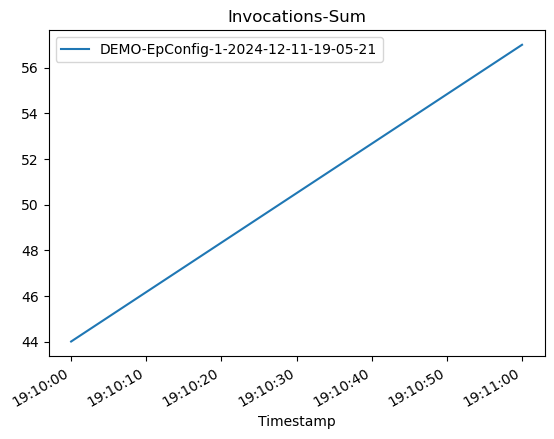

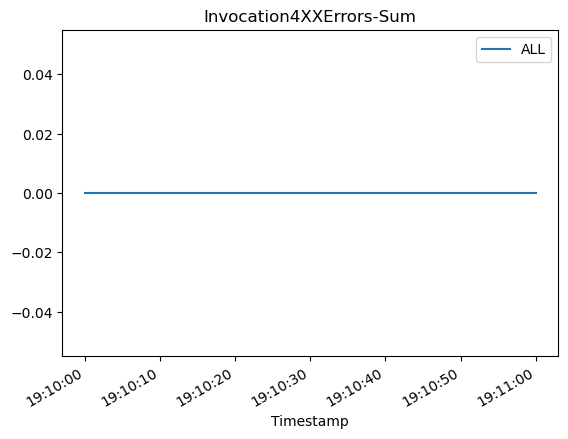

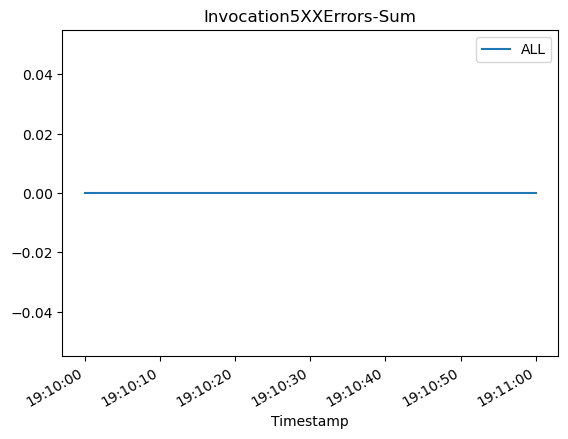

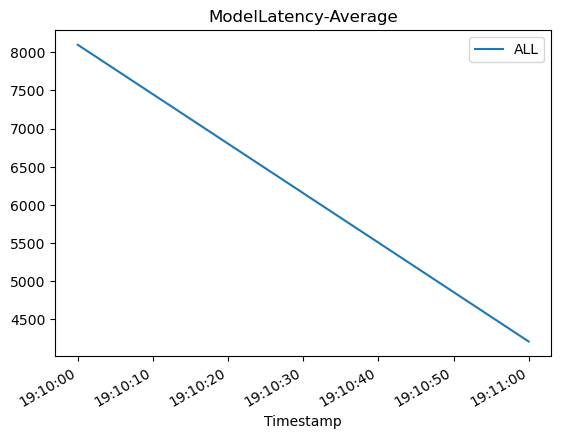

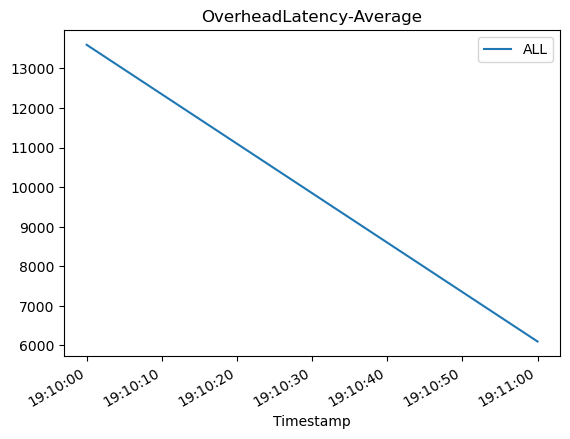

In [18]:
invocation_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, ep_config_name, "AllTraffic", "Invocations", "Sum"
)
invocation_4xx_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "Invocation4XXErrors", "Sum"
)
invocation_5xx_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "Invocation5XXErrors", "Sum"
)
model_latency_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "ModelLatency", "Average"
)
overhead_latency_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "OverheadLatency", "Average"
)

### Create CloudWatch alarms to monitor Endpoint performance <a id='Step3'></a>

Create CloudWatch alarms to monitor Endpoint performance with following metrics:
* Invocation5XXErrors
* ModelLatency

Following metric dimensions are used to select the metric per Endpoint config and variant:
* EndpointName
* VariantName

In [19]:
# The following function creates a CloudWatch alarm for monitoring a SageMaker endpoint to enable automatic rollbacks if issues are detected
# The function takes parameters:
# alarm_name: Name for the CloudWatch alarm
# endpoint_name: SageMaker endpoint to monitor
# variant_name: Specific variant of the endpoint to watch
# metric_name: Which metric to track (e.g., errors, latency)
# statistic: How to aggregate the metric (e.g., Sum, Average)
#threshold: Value that triggers the alarm

# The put_metric_alarm configuration:
# ActionsEnabled=False: Initially creates the alarm with actions disabled
# Namespace="AWS/SageMaker": Uses the SageMaker metrics namespace
# Period=60: Checks metrics every 60 seconds
# EvaluationPeriods=1: Triggers after 1 period above threshold
# ComparisonOperator="GreaterThanOrEqualToThreshold": Alarms when metric ≥ threshold
# TreatMissingData="notBreaching": Missing data won't trigger the alarm

def create_auto_rollback_alarm(
    alarm_name, endpoint_name, variant_name, metric_name, statistic, threshold
):
    cw.put_metric_alarm(
        AlarmName=alarm_name,
        AlarmDescription="Test SageMaker endpoint deployment auto-rollback alarm",
        ActionsEnabled=False,
        Namespace="AWS/SageMaker",
        MetricName=metric_name,
        Statistic=statistic,
        Dimensions=[
            {"Name": "EndpointName", "Value": endpoint_name},
            {"Name": "VariantName", "Value": variant_name},
        ],
        Period=60,
        EvaluationPeriods=1,
        Threshold=threshold,
        ComparisonOperator="GreaterThanOrEqualToThreshold",
        TreatMissingData="notBreaching",
    )

The following alarms serve as automated guardrails - if the new deployment causes high error rates or significant latency increases, they can trigger an automatic rollback to the previous stable version.

In [20]:
#error rate alarm:
#Monitors 5XX errors (server-side errors)
#Named "TestAlarm-5XXErrors-[endpoint-name]"
#Triggers if average error rate hits 1 in a minute
#Watches "AllTraffic" variant (all endpoint traffic)
error_alarm = f"TestAlarm-5XXErrors-{endpoint_name}"
# latency alarm
# Monitors model inference latency
#Named "TestAlarm-ModelLatency-[endpoint-name]"
#Triggers if average latency exceeds 10,000 microseconds (10 ms)
#Also watches all traffic
latency_alarm = f"TestAlarm-ModelLatency-{endpoint_name}"

# alarm on 1 5xx error rate for 1 minute
create_auto_rollback_alarm(
    error_alarm, endpoint_name, "AllTraffic", "Invocation5XXErrors", "Average", 1
)
# alarm on model latency >= 10 ms for 1 minute
create_auto_rollback_alarm(
    latency_alarm, endpoint_name, "AllTraffic", "ModelLatency", "Average", 10000
)

In [21]:
cw.describe_alarms(AlarmNames=[error_alarm, latency_alarm])
time.sleep(60)

### Update Endpoint with deployment configurations <a id='Step4'></a>

Update the endpoint with deployment configurations and monitor the performance from CloudWatch metrics.

### BlueGreen update policy with Canary traffic shifting

We define the following deployment configuration to perform Blue/Green update strategy with Canary traffic shifting from old to new stack. The Canary traffic shifting option can reduce the blast ratio of a regressive update to the endpoint. In contrast, for the All-At-Once traffic shifting option, the invocation requests start failing at 100% after flipping the traffic. In the Canary mode, invocation requests are shifted to the new version of model gradually, preventing errors from impacting 100% of your traffic. Additionally, the auto-rollback alarms monitor the metrics during the canary stage.

### Rollback Case 


Update the Endpoint with an incompatible model version to simulate errors and trigger a rollback. The following cell configures and initiates a canary deployment for a SageMaker endpoint

In [22]:
canary_deployment_config = {
    "BlueGreenUpdatePolicy": {
        "TrafficRoutingConfiguration": {
            "Type": "CANARY", # Uses a CANARY deployment strategy
            "CanarySize": {
                "Type": "INSTANCE_COUNT",  # or use "CAPACITY_PERCENT" as 30%, 50%
                "Value": 1, # Routes traffic to 1 instance first 
            },
            "WaitIntervalInSeconds": 300,  # wait for 5 minutes before routing traffic on the rest of fleet
        },
        "TerminationWaitInSeconds": 120,  # wait for 2 minutes before terminating the old stack
        "MaximumExecutionTimeoutInSeconds": 1800,  # maximum timeout for deployment
    },
    "AutoRollbackConfiguration": { # Links the previously created alarms (for 5XX errors and latency)
        "Alarms": [{"AlarmName": error_alarm}, {"AlarmName": latency_alarm}],
    },
}

# update endpoint request with new DeploymentConfig parameter
sm.update_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=ep_config_name2, # incompatible model version will be behind the endpoint
    DeploymentConfig=canary_deployment_config,
)

{'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'ResponseMetadata': {'RequestId': '5eb70657-3cc3-4987-b521-a38b6bc235ff',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5eb70657-3cc3-4987-b521-a38b6bc235ff',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '121',
   'date': 'Wed, 11 Dec 2024 19:18:44 GMT'},
  'RetryAttempts': 0}}

In [23]:
sm.describe_endpoint(EndpointName=endpoint_name)

{'EndpointName': 'DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointConfigName': 'DEMO-EpConfig-1-2024-12-11-19-05-21',
 'ProductionVariants': [{'VariantName': 'AllTraffic',
   'DeployedImages': [{'SpecifiedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
     'ResolvedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner@sha256:2e3a9eeeb8246b7f2a0438e39457ffce204e200676693566b021e31c9291cb68',
     'ResolutionTime': datetime.datetime(2024, 12, 11, 19, 5, 48, 171000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 3,
   'DesiredInstanceCount': 3}],
 'EndpointStatus': 'Updating',
 'CreationTime': datetime.datetime(2024, 12, 11, 19, 5, 47, 146000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2024, 12, 11, 19, 18, 45, 514000, tzinfo=tzlocal()),
 'LastD

### We invoke the endpoint during the update operation is in progress.

**Note : Invoke endpoint in this notebook is in single thread mode, to stop the invoke requests please stop the cell execution**

The E's denote the errors generated from the incompatible model version in the canary fleet.

The purpose of the below cell is to simulate errors in the canary fleet. Since the nature of traffic shifting to the canary fleet is probabilistic, you should wait until you start seeing errors. Then, you may proceed to stop the execution of the below cell. If not aborted, cell will run for 600 invocations.

In [24]:
invoke_endpoint(endpoint_name)

Sending test traffic to the endpoint DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46. 
Please wait...
.....................................................................................................................................................................................E...E....E..E.E......E.....EEEE.........EE...E..E.........E...E.EEE...E....E..E..EEE...EE.E.E..E....E........EE.E..E..E..EE.E..E...E....E.EE..E....EE.EE.EEE....E...EEE.EE.EE..EE.E..E...E.....EE.EEE.....EEE........E..E....E..E.E.....E.E...E..EE.E......EEE..E...E...EE...EEE..EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE.............................
Done!


In [25]:
wait_for_endpoint_in_service(endpoint_name)

sm.describe_endpoint(EndpointName=endpoint_name)

Waiting for endpoint in service

Done!


{'EndpointName': 'DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointConfigName': 'DEMO-EpConfig-1-2024-12-11-19-05-21',
 'ProductionVariants': [{'VariantName': 'AllTraffic',
   'DeployedImages': [{'SpecifiedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
     'ResolvedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner@sha256:2e3a9eeeb8246b7f2a0438e39457ffce204e200676693566b021e31c9291cb68',
     'ResolutionTime': datetime.datetime(2024, 12, 11, 19, 5, 48, 171000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 3,
   'DesiredInstanceCount': 3}],
 'EndpointStatus': 'InService',
 'FailureReason': 'One or more configured alarm for automatic rollback deployment is in ALARM state: [TestAlarm-ModelLatency-DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46].',
 '

Collect the endpoint metrics during the deployment:

Below, we are going to plot graphs to show the Invocations,Invocation5XXErrors and ModelLatency against the Endpoint.

You can expect to see as the new endpoint config-2 (erroneous due to model version) starts getting deployed, it encounters failure and leads to the rollback to endpoint config-1. This can be seen in the graphs below as the Invocation5XXErrors and ModelLatency increases during this rollback phase

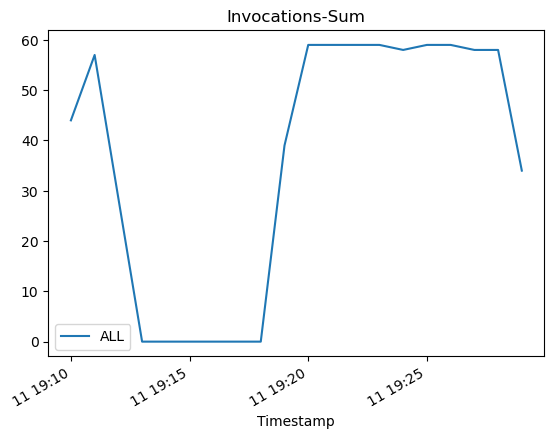

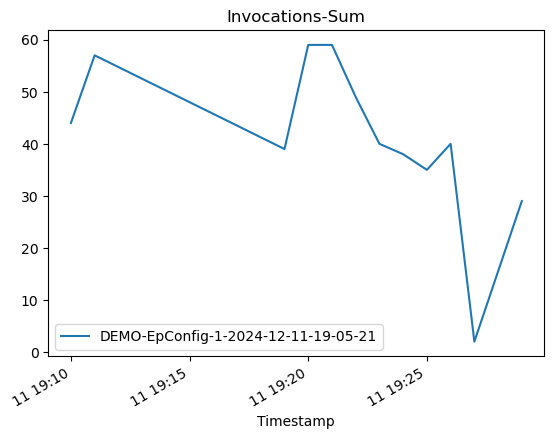

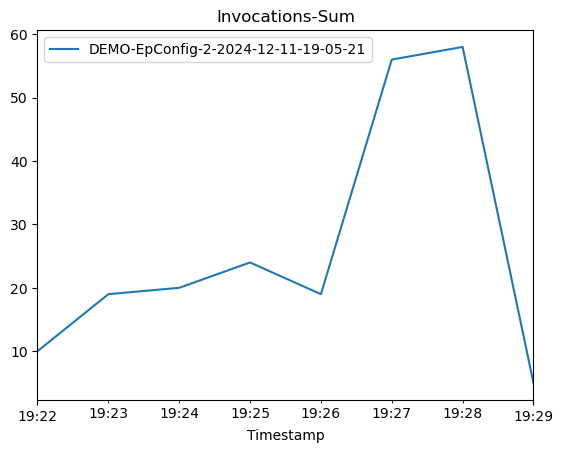

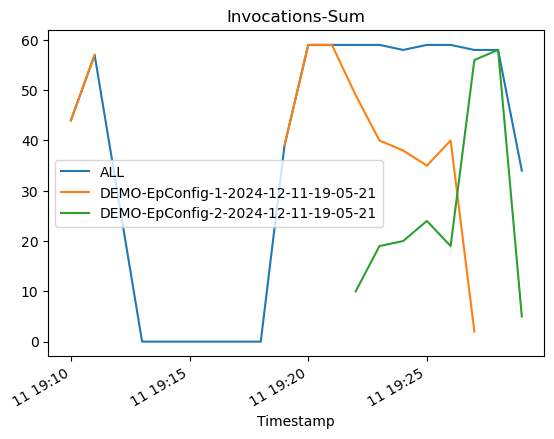

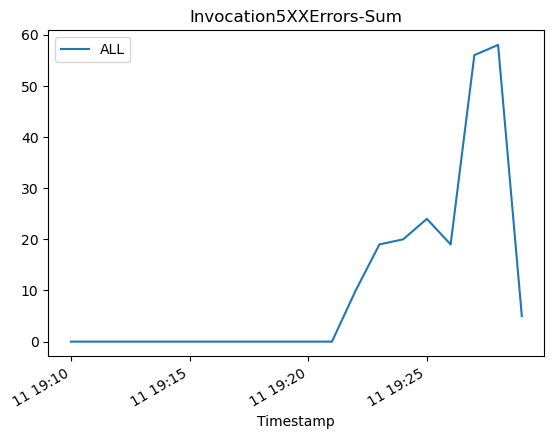

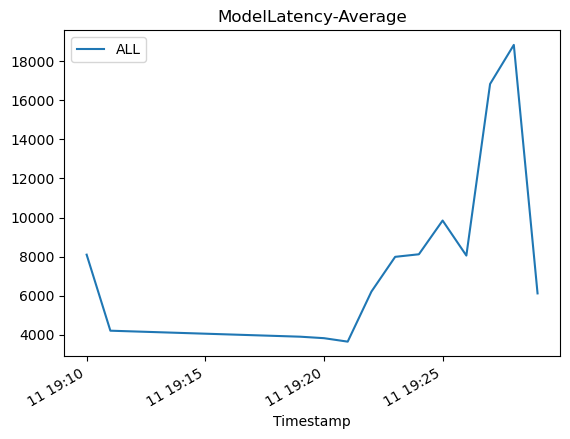

In [26]:
invocation_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "Invocations", "Sum"
)
metrics_epc_1 = plot_endpoint_invocation_metrics(
    endpoint_name, ep_config_name, "AllTraffic", "Invocations", "Sum"
)
metrics_epc_2 = plot_endpoint_invocation_metrics(
    endpoint_name, ep_config_name2, "AllTraffic", "Invocations", "Sum"
)

metrics_all = invocation_metrics.join([metrics_epc_1, metrics_epc_2], how="outer")
metrics_all.plot(title="Invocations-Sum")

invocation_5xx_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "Invocation5XXErrors", "Sum"
)
model_latency_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "ModelLatency", "Average"
)

Let's take a look at the Success case where we use the same Canary deployment configuration but a valid endpoint configuration.

### Success Case


Now we show the success case where the Endpoint Configuration is updated to a valid version (using the same Canary deployment config as the rollback case).

Update the endpoint with the same Canary deployment configuration:

In [27]:
# update endpoint with a valid version of DeploymentConfig

sm.update_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=ep_config_name3,
    RetainDeploymentConfig=True,
)

{'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'ResponseMetadata': {'RequestId': 'dc7b9df5-d311-451d-b000-fecc12b0aa26',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'dc7b9df5-d311-451d-b000-fecc12b0aa26',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '121',
   'date': 'Wed, 11 Dec 2024 19:31:08 GMT'},
  'RetryAttempts': 0}}

In [28]:
sm.describe_endpoint(EndpointName=endpoint_name)

{'EndpointName': 'DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointConfigName': 'DEMO-EpConfig-1-2024-12-11-19-05-21',
 'ProductionVariants': [{'VariantName': 'AllTraffic',
   'DeployedImages': [{'SpecifiedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
     'ResolvedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner@sha256:2e3a9eeeb8246b7f2a0438e39457ffce204e200676693566b021e31c9291cb68',
     'ResolutionTime': datetime.datetime(2024, 12, 11, 19, 5, 48, 171000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 3,
   'DesiredInstanceCount': 3}],
 'EndpointStatus': 'Updating',
 'FailureReason': 'One or more configured alarm for automatic rollback deployment is in ALARM state: [TestAlarm-ModelLatency-DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46].',
 'C

In [29]:
invoke_endpoint(endpoint_name, max_invocations=500)

Sending test traffic to the endpoint DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46. 
Please wait...
.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
Done!


In [30]:
#wait_for_endpoint_in_service(endpoint_name)

sm.describe_endpoint(EndpointName=endpoint_name)

{'EndpointName': 'DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:145431273548:endpoint/DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46',
 'EndpointConfigName': 'DEMO-EpConfig-1-2024-12-11-19-05-21',
 'ProductionVariants': [{'VariantName': 'AllTraffic',
   'DeployedImages': [{'SpecifiedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
     'ResolvedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner@sha256:2e3a9eeeb8246b7f2a0438e39457ffce204e200676693566b021e31c9291cb68',
     'ResolutionTime': datetime.datetime(2024, 12, 11, 19, 5, 48, 171000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 0,
   'DesiredInstanceCount': 3}],
 'EndpointStatus': 'Updating',
 'FailureReason': 'One or more configured alarm for automatic rollback deployment is in ALARM state: [TestAlarm-ModelLatency-DEMO-Deployment-Guardrails-Canary-2024-12-11-19-05-46].',
 'C

Collect the endpoint metrics during the deployment:

Below, we are going to plot graphs to show the Invocations,Invocation5XXErrors and ModelLatency against the Endpoint.

You can expect to see that, as the new endpoint config-3 (correct model version) starts getting deployed, it takes over endpoint config-2 (incompatible due to model version) without any errors. This can be seen in the graphs below as the Invocation5XXErrors and ModelLatency decreases during this transition phase


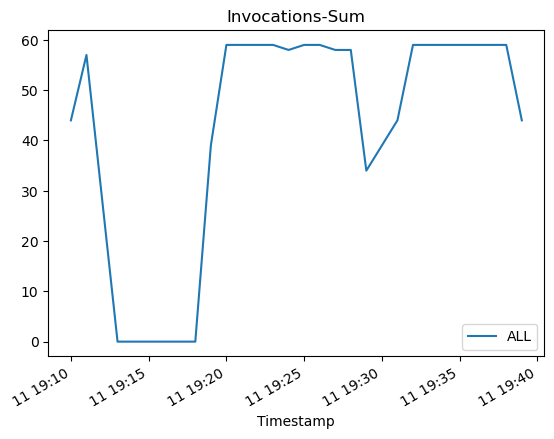

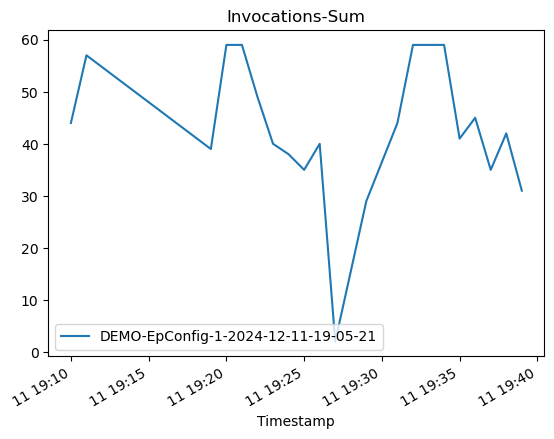

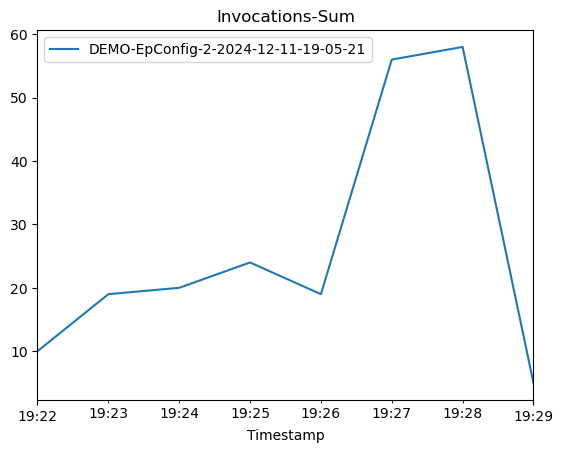

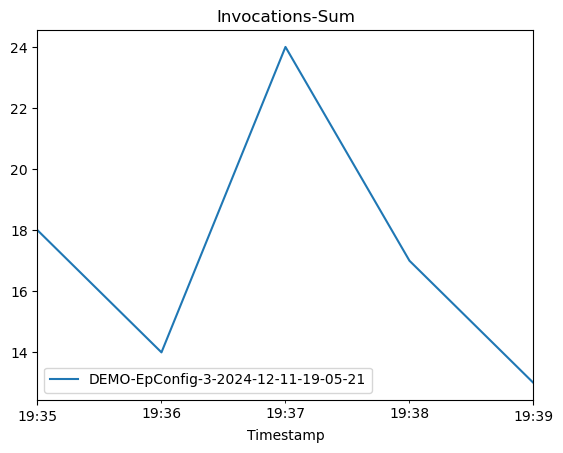

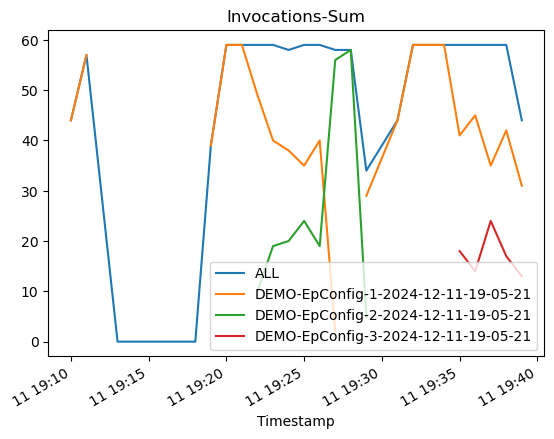

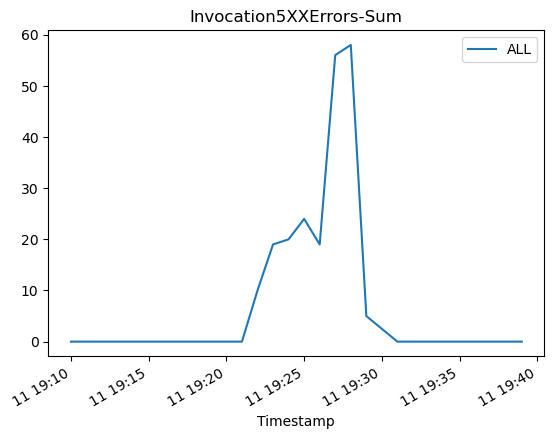

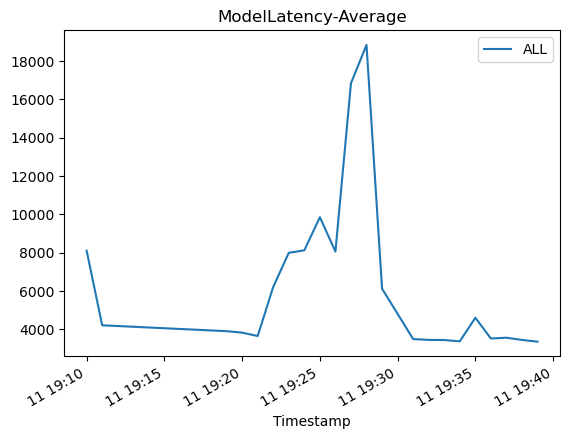

In [31]:
invocation_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "Invocations", "Sum"
)
metrics_epc_1 = plot_endpoint_invocation_metrics(
    endpoint_name, ep_config_name, "AllTraffic", "Invocations", "Sum"
)
metrics_epc_2 = plot_endpoint_invocation_metrics(
    endpoint_name, ep_config_name2, "AllTraffic", "Invocations", "Sum"
)
metrics_epc_3 = plot_endpoint_invocation_metrics(
    endpoint_name, ep_config_name3, "AllTraffic", "Invocations", "Sum"
)

metrics_all = invocation_metrics.join([metrics_epc_1, metrics_epc_2, metrics_epc_3], how="outer")
metrics_all.plot(title="Invocations-Sum")

invocation_5xx_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "Invocation5XXErrors", "Sum"
)
model_latency_metrics = plot_endpoint_invocation_metrics(
    endpoint_name, None, "AllTraffic", "ModelLatency", "Average"
)

In [37]:
sm.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '00922e13-152c-42ca-97c7-60b692cac534',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '00922e13-152c-42ca-97c7-60b692cac534',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 11 Dec 2024 19:46:42 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}

In [33]:
# sm.delete_endpoint_config(EndpointConfigName=ep_config_name)
# sm.delete_endpoint_config(EndpointConfigName=ep_config_name2)
# sm.delete_endpoint_config(EndpointConfigName=ep_config_name3)

In [ ]:
# sm.delete_model(ModelName=model_name)
# sm.delete_model(ModelName=model_name2)
# sm.delete_model(ModelName=model_name3)

-----------------------------------------------------------------------------------------------------
### NOTE: The following cell is for Shadow Testing. 

In [7]:
import time
import os
import boto3
import botocore
import re
import json
from datetime import datetime, timedelta, timezone
from sagemaker import get_execution_role, session
from sagemaker.s3 import S3Downloader, S3Uploader

region = boto3.Session().region_name

# You can use a different IAM role with "SageMakerFullAccess" policy for this notebook
role = get_execution_role()

print(f"Execution role: {role}")

sm_session = session.Session(boto3.Session())
sm = boto3.Session().client("sagemaker")
sm_runtime = boto3.Session().client("sagemaker-runtime")

[12/12/24 01:10:00] INFO     Found credentials from IAM Role:                                   ]8;id=176688;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=650997;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

Execution role: arn:aws:iam::145431273548:role/LabRole


                    INFO     Found credentials from IAM Role:                                   ]8;id=956395;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=582102;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[12/12/24 01:10:01] INFO     Found credentials from IAM Role:                                   ]8;id=237453;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=992822;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=376332;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=74688;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [4]:
# Define bucket name and prefix
bucket = "training-loan-rn"
prefix = "models"

# Construct S3 URIs for the model files
model_url1 = f"s3://{bucket}/{prefix}/model.tar.gz"
model_url2 = f"s3://{bucket}/{prefix}/model2.tar.gz"

In [5]:
from sagemaker import image_uris

# Retrieve the image URI for Linear Learner
image_uri = image_uris.retrieve("linear-learner", boto3.Session().region_name)

# This is the image 2 which is going to fail 
image_uri2 = image_uris.retrieve("xgboost", boto3.Session().region_name, "1.2-1")
image_uri3 = image_uris.retrieve("linear-learner", boto3.Session().region_name)


[12/12/24 00:32:32] INFO     Same images used for training and inference. Defaulting to image     ]8;id=83975;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=883148;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#387\387]8;;\
                             scope: inference.                                                                     

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=629920;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=758162;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#524\524]8;;\

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=554799;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=668962;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#524\524]8;;\

                    INFO     Same images used for training and inference. Defaulting to image     ]8;id=512947;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=636202;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#387\387]8;;\
                             scope: inference.                                                                     

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=731595;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=157717;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#524\524]8;;\

In [55]:
import boto3
from sagemaker import get_execution_role, Session
                
aws_region = region

boto_session = boto3.Session(region_name=aws_region)
sagemaker_client = boto_session.client("sagemaker")

role = get_execution_role()

bucket = bucket

model_name1 = "prod-model"
model_name2 = "shadow-model"

sagemaker_client.create_model(
    ModelName = model_name1,
    ExecutionRoleArn = role,
    Containers=[
        {
            "Image": image_uri,
            "ModelDataUrl": model_url1
        }
    ]
)

sagemaker_client.create_model(
    ModelName = model_name2,
    ExecutionRoleArn = role,
    Containers=[
        {
            "Image": image_uri3,
            "ModelDataUrl": model_url2
        }
    ]
)

{'ModelArn': 'arn:aws:sagemaker:us-east-1:145431273548:model/shadow-model',
 'ResponseMetadata': {'RequestId': '691fcf3d-307b-4407-92d8-d8a85b049f6a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '691fcf3d-307b-4407-92d8-d8a85b049f6a',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '74',
   'date': 'Wed, 11 Dec 2024 23:54:15 GMT'},
  'RetryAttempts': 2}}

In [56]:
endpoint_config_name = "shadow-endpoint"

create_endpoint_config_response = sagemaker_client.create_endpoint_config(
    EndpointConfigName=endpoint_config_name,
    ProductionVariants=[
        {
            "VariantName": "prductionvariabnt",
            "ModelName": model_name1,
            "InstanceType": "ml.m5.xlarge",
            "InitialInstanceCount": 1,
            "InitialVariantWeight": 1,
        }
    ],
    ShadowProductionVariants=[
        {
            "VariantName":"shadow-variant",
            "ModelName": model_name2,
            "InstanceType": "ml.m5.xlarge",
            "InitialInstanceCount": 1,
            "InitialVariantWeight": 1,
        }
   ]
)

In [58]:
create_endpoint_response = sm.create_endpoint(
    EndpointName="new-endpoint",
    EndpointConfigName=endpoint_config_name,
)
    

In [6]:
def invoke_endpoint(endpoint_name, should_raise_exp=False):
    with open("data/test_no_target.csv", "r") as f:
        for row in f:
            payload = row.rstrip("\n")
            try:

                response = sm_runtime.invoke_endpoint(
                    EndpointName=endpoint_name, ContentType="text/csv", Body=payload
                    )
            except Exception as e:
                print("E", end="", flush=True)
                if should_raise_exp:
                    raise e


invoke_endpoint("new-endpoint")

In [12]:
status_response = sm.describe_endpoint(EndpointName="new-endpoint")
status = status_response["EndpointStatus"]
if status == "InService":
    print("Shadow variant is now handling all traffic.")
else:
    print("Endpoint update failed.")

Shadow variant is now handling all traffic.
